In [10]:
import pandas as pd
import openpyxl
import requests

In [11]:
# read income data, 218 countries
incomegroup = pd.read_excel("income group.xlsx",sheet_name='Sheet1')

incomegroup = pd.melt(incomegroup, id_vars=['CountryCode','CountryName'], value_vars=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020], var_name='Year', value_name='incomeGroup')

# left join with region table.
region = pd.read_csv("country_region.csv")[['Country','Region']]
countryInfo = incomegroup.merge(region, left_on='CountryName', right_on='Country') # inner join
countryInfo = countryInfo[['Country','CountryCode','Region','Year','incomeGroup']]

In [12]:
countryInfo

,Country,CountryCode,Region,Year,incomeGroup
0,Afghanistan,AFG,South Asia,2000,L
1,Afghanistan,AFG,South Asia,2001,L
2,Afghanistan,AFG,South Asia,2002,L
3,Afghanistan,AFG,South Asia,2003,L
4,Afghanistan,AFG,South Asia,2004,L
...,...,...,...,...,...
4489,Zimbabwe,ZWE,Sub-Saharan Africa,2016,L
4490,Zimbabwe,ZWE,Sub-Saharan Africa,2017,L
4491,Zimbabwe,ZWE,Sub-Saharan Africa,2018,LM
4492,Zimbabwe,ZWE,Sub-Saharan Africa,2019,LM


In [13]:
healthExp = pd.read_excel("healthExp_data.xlsx",sheet_name='cleaned')
healthExp = healthExp[['country','year','che_gdp']]
# merge datasets based on two columns:
countryInfoAll = countryInfo.merge(healthExp, left_on=['Country','Year'], right_on=['country','year']) # inner join
countryInfoAll = countryInfoAll[['Country','Region','CountryCode','Year','incomeGroup','che_gdp']]
countryInfoAll

,Country,Region,CountryCode,Year,incomeGroup,che_gdp
0,Afghanistan,South Asia,AFG,2000,L,NaN
1,Afghanistan,South Asia,AFG,2001,L,NaN
2,Afghanistan,South Asia,AFG,2002,L,9.443390
3,Afghanistan,South Asia,AFG,2003,L,8.941258
4,Afghanistan,South Asia,AFG,2004,L,9.808474
...,...,...,...,...,...,...
3275,Zimbabwe,Sub-Saharan Africa,ZWE,2015,L,7.452066
3276,Zimbabwe,Sub-Saharan Africa,ZWE,2016,L,7.675163
3277,Zimbabwe,Sub-Saharan Africa,ZWE,2017,L,7.469752
3278,Zimbabwe,Sub-Saharan Africa,ZWE,2018,LM,8.680062


In [14]:
countryInfoAll.Region.unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'North America'], dtype=object)

In [15]:
countryInfoAll.isna().sum()

Country         0
Region          0
CountryCode     0
Year            0
incomeGroup     0
che_gdp        55
dtype: int64

In [16]:
# code = {'WHOSIS_000001':'LifeExpectancy','MDG_0000000007':'Under5_Mortality'}: LifeExpectancy data was reported every 5 year
def getDataFrame(url):
    data = requests.get(url).json()
    data = data['value']
    data = pd.DataFrame(data)
    return data

LifeExpectancy_1 = getDataFrame('https://ghoapi.azureedge.net/api/WHOSIS_000001')
Under5_Mortality_1 = getDataFrame('https://ghoapi.azureedge.net/api/MDG_0000000007')
MaternalMortalityRatio_1 = getDataFrame('https://ghoapi.azureedge.net/api/MDG_0000000026')

##### data inspection

In [17]:
# how the health outcome change over time, but this dataset use a slightly different region categories from what the following analysis used.
def lineplot_time(HealthOutcomeData):
    """
    :param HealthOutcomeData: data set of health outcome data: Under5_Mortality, LifeExpectancy
    :return:
    """
    b = HealthOutcomeData[(HealthOutcomeData['Dim1'] == 'BTSX') & (HealthOutcomeData['SpatialDimType'] == 'REGION')][['TimeDim','NumericValue','SpatialDim']]
    a = b[b['SpatialDim'] != 'GLOBAL'] # no global value
    a = a.astype({"TimeDim": str})
    a = a.pivot(index='TimeDim', columns='SpatialDim',values = 'NumericValue')
    a = a.rename_axis(None, axis=1)
    p = sns.lineplot(data=a)
    p.set( xlabel = "Year", ylabel = 'Value')

In [18]:
lineplot_time(LifeExpectancy_1)

NameError: name 'sns' is not defined

In [19]:
# Sub-Saharan Africa is part of African Region AFRO.
lineplot_time(Under5_Mortality_1)

NameError: name 'sns' is not defined

In [20]:
Under5_Mortality_1[(Under5_Mortality_1['TimeDim'] == 2010) & (Under5_Mortality_1['SpatialDimType'] == "COUNTRY")& (Under5_Mortality_1['Dim1'] == "BTSX")][['NumericValue','SpatialDim']]

,NumericValue,SpatialDim
802,87.75619,AFG
925,120.35612,AGO
1054,13.25660,ALB
1162,4.50005,AND
1345,8.65764,ARE
...,...,...
35326,19.34816,WSM
35506,58.79103,YEM
35647,51.98301,ZAF
35850,79.01105,ZMB


In [367]:
# 2010: country mortality
countryInfoAll[countryInfoAll['CountryCode'] == 'HTI']

,Country,Region,CountryCode,Year,incomeGroup,che_gdp
1280,Haiti,Latin America & Caribbean,HTI,2000,L,3.959640
1281,Haiti,Latin America & Caribbean,HTI,2001,L,3.730882
1282,Haiti,Latin America & Caribbean,HTI,2002,L,3.405104
1283,Haiti,Latin America & Caribbean,HTI,2003,L,3.414277
1284,Haiti,Latin America & Caribbean,HTI,2004,L,3.447301
1285,Haiti,Latin America & Caribbean,HTI,2005,L,3.368438
1286,Haiti,Latin America & Caribbean,HTI,2006,L,3.531488
1287,Haiti,Latin America & Caribbean,HTI,2007,L,3.728293
1288,Haiti,Latin America & Caribbean,HTI,2008,L,3.792944
1289,Haiti,Latin America & Caribbean,HTI,2009,L,3.604476


In [214]:
def formatWithSex(name, df):
    """
    only applies to life expectancy and Under5_Mortality
    :param name: reformat with sex, pivot that column
    :param df:
    :return:
    """
    df = df[df['SpatialDimType'] == 'COUNTRY']
    df = df[['SpatialDim','TimeDim','Dim1','NumericValue']]
    df = df.rename(columns={"SpatialDim":"countrycode", "TimeDim":"year", "Dim1":"Sex","NumericValue": 'df'})
    df = df.pivot(index=['countrycode','year'],columns = ['Sex'],values= 'df')
    df = df.reset_index()
    df.rename(columns={'BTSX':f'{name}_BTSX','FMLE':f'{name}_FMLE','MLE':f'{name}_MLE'},inplace=True)
    df = df[['countrycode','year',f'{name}_BTSX',f'{name}_FMLE',f'{name}_MLE']]
    df = df.rename_axis(None, axis=1) # remove "Sex" as the index name
    return df

Under5_Mortality = formatWithSex('Under5_Mortality', Under5_Mortality_1)
LifeExpectancy = formatWithSex('LifeExpectancy', LifeExpectancy_1)

In [217]:
Under5_Mortality

,countrycode,year,Under5_Mortality_BTSX,Under5_Mortality_FMLE,Under5_Mortality_MLE
0,AFG,1957,377.84123,NaN,NaN
1,AFG,1958,370.90156,NaN,NaN
2,AFG,1959,364.40799,NaN,NaN
3,AFG,1960,358.20515,NaN,NaN
4,AFG,1961,352.21199,343.73110,359.77775
...,...,...,...,...,...
12004,ZWE,2016,58.66147,53.50827,63.56478
12005,ZWE,2017,57.04974,51.93884,61.91988
12006,ZWE,2018,54.84205,49.82213,59.56721
12007,ZWE,2019,54.23561,49.32882,58.92604


In [338]:
# 'MDG_0000000026':'MaternalMortalityRatio': this column does not apply to SEX
def formatWithoutSex(df):
    df = df[df['SpatialDimType'] == 'COUNTRY']
    df = df[['SpatialDim','TimeDim','NumericValue']]
    df = df.rename(columns={"SpatialDim":"countrycode", "TimeDim":"year", "NumericValue": 'MaternalMortalityRatio'})
    df = df.astype({"year": str})
    df = df[['countrycode','year','MaternalMortalityRatio']]
    return df

MaternalMortalityRatio = formatWithoutSex(MaternalMortalityRatio_1)

<AxesSubplot:xlabel='year', ylabel='MaternalMortalityRatio'>

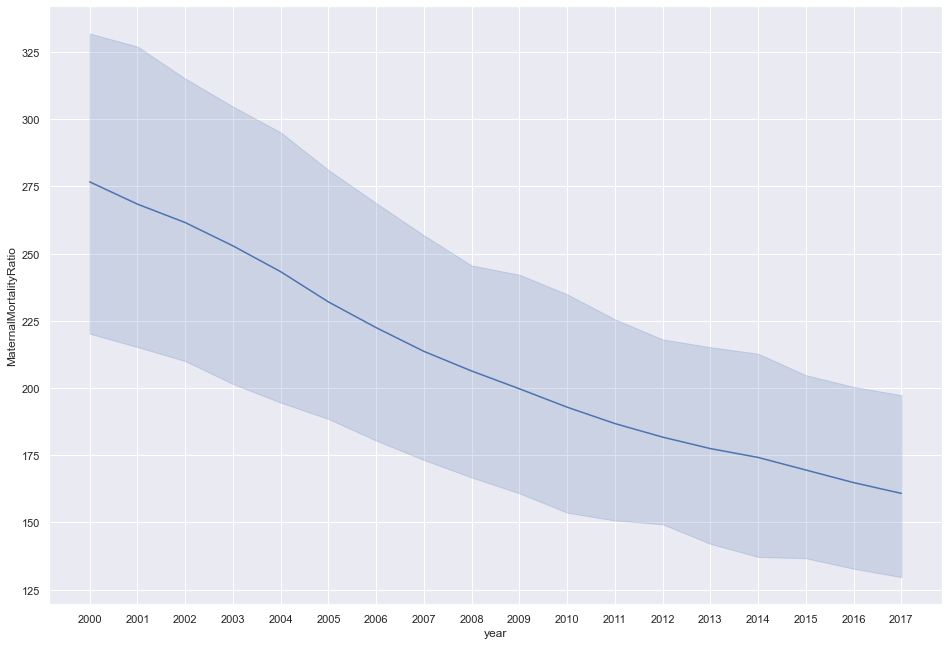

In [339]:
# the average of Maternal Mortality Ratio over the world was decreasing over time

# MaternalMortalityRatio: definition
MaternalMortalityRatio = MaternalMortalityRatio.sort_values('year')
sns.lineplot(data=MaternalMortalityRatio, x="year", sort=False,y="MaternalMortalityRatio")

In [30]:
# merge datasets with country info dataset
InfoAll = countryInfoAll.merge(LifeExpectancy, left_on=['CountryCode','Year'], right_on=['countrycode','year'], how= 'left')
InfoAll = InfoAll.merge(Under5_Mortality, left_on=['CountryCode','Year'], right_on=['countrycode','year'], how= 'left')
InfoAll = InfoAll.merge(MaternalMortalityRatio, left_on=['CountryCode','Year'], right_on=['countrycode','year'], how= 'left')
InfoAll = InfoAll[['Country','Region','CountryCode','Year','incomeGroup','che_gdp','LifeExpectancy_BTSX','LifeExpectancy_FMLE','LifeExpectancy_MLE','Under5_Mortality_BTSX','Under5_Mortality_FMLE','Under5_Mortality_MLE','MaternalMortalityRatio']]

### all data includes health expendure, three factors, year, incomegroup, and region for each country

In [32]:
InfoAll

,Country,Region,CountryCode,Year,incomeGroup,che_gdp,LifeExpectancy_BTSX,LifeExpectancy_FMLE,LifeExpectancy_MLE,Under5_Mortality_BTSX,Under5_Mortality_FMLE,Under5_Mortality_MLE,MaternalMortalityRatio
0,Afghanistan,South Asia,AFG,2000,L,NaN,54.98949,55.41726,54.57449,129.17851,124.62522,133.52707,1450.0
1,Afghanistan,South Asia,AFG,2001,L,NaN,NaN,NaN,NaN,125.18581,120.79429,129.35359,1390.0
2,Afghanistan,South Asia,AFG,2002,L,9.443390,NaN,NaN,NaN,121.06367,116.89275,125.00544,1300.0
3,Afghanistan,South Asia,AFG,2003,L,8.941258,NaN,NaN,NaN,116.91188,112.69169,120.83735,1240.0
4,Afghanistan,South Asia,AFG,2004,L,9.808474,NaN,NaN,NaN,112.63116,108.52726,116.57782,1180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,Zimbabwe,Sub-Saharan Africa,ZWE,2015,L,7.452066,58.47603,60.95527,55.73344,61.27913,56.05436,66.31459,480.0
3276,Zimbabwe,Sub-Saharan Africa,ZWE,2016,L,7.675163,NaN,NaN,NaN,58.66147,53.50827,63.56478,468.0
3277,Zimbabwe,Sub-Saharan Africa,ZWE,2017,L,7.469752,NaN,NaN,NaN,57.04974,51.93884,61.91988,458.0
3278,Zimbabwe,Sub-Saharan Africa,ZWE,2018,LM,8.680062,NaN,NaN,NaN,54.84205,49.82213,59.56721,NaN


##### which factor is correlated with health expenditure?

In [13]:
# InfoAll.to_csv("InfoAll.csv",index=False)

###### anova table shows that all three factors were related to health expenditure, of which the region has the most significant correlation

In [129]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('che_gdp ~ Year+incomeGroup+Region', data=InfoAll).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Year,327.260740,19.0,2.784900,5.347052e-05
incomeGroup,393.647111,3.0,21.215592,1.326291e-13
Region,1545.575362,6.0,41.649355,4.028204e-49
Residual,19581.301987,3166.0,NaN,NaN


In [346]:
yearexp = InfoAll[['che_gdp','Year']].dropna()
pearsonr(yearexp['che_gdp'], yearexp['Year'])

(0.11329528204354981, 1.1022013594640358e-10)

In [351]:
# health expenditure per region per year
InfoAll2015_ = InfoAll.loc[(InfoAll["Year"] == 2015) | (InfoAll["Year"] == 2016) | (InfoAll["Year"] == 2017) | (InfoAll["Year"] == 2018) | (InfoAll["Year"] == 2019)]
d = InfoAll2015_[['Region','Year','che_gdp']]
d = d.dropna()
d = d.pivot_table(index='Region', columns='Year',values = 'che_gdp', aggfunc='mean')

In [352]:
d

Year,2015,2016,2017,2018,2019
Region,,,,,
East Asia & Pacific,6.809137,6.669258,6.673334,6.739615,7.210822
Europe & Central Asia,7.628844,7.650285,7.588706,7.589544,7.735785
Latin America & Caribbean,6.853407,6.848583,6.876387,6.998009,7.110047
Middle East & North Africa,5.456460,5.490857,5.576039,5.565831,5.542898
North America,10.733205,11.022961,10.835383,10.806375,10.844478
South Asia,5.103873,5.479239,5.223773,5.265578,5.286553
Sub-Saharan Africa,5.960786,5.840205,5.684228,5.676715,5.551029


###### correlation between independent var = region and dependent var = che_gdp in Year 2019


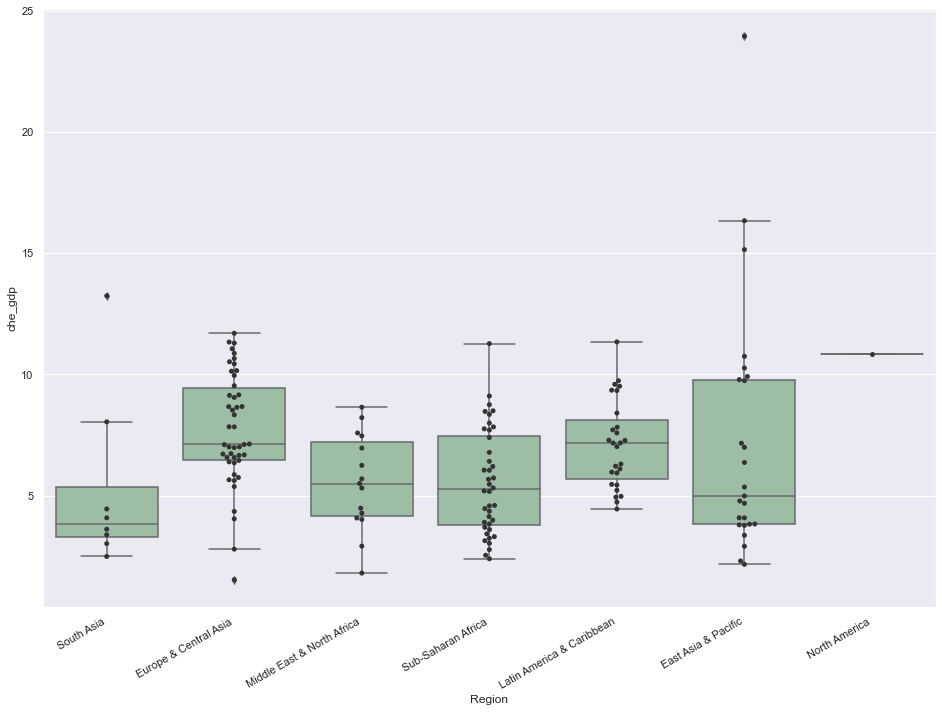

<Figure size 576x360 with 0 Axes>

In [239]:
# generate a boxplot to see the health expenditure distribution by income groups. Using boxplot, we can easily detect the differences between income groups
import matplotlib.pyplot as plt
import seaborn as sns
# CAN is only country in North America
ax = sns.boxplot(x='Region', y='che_gdp', data= InfoAll[InfoAll['Year'] == 2019], color='#99c2a2')
# sns.set(rc={'figure.figsize':(16,11)})
ax = sns.swarmplot(x="Region", y="che_gdp", data=  InfoAll[InfoAll['Year'] == 2019],color=".2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha="right")

plt.show()
# highest value: Tuvalu in East Asia

##### Effect of Health Expenditure on Selected Health Outcomes

In [21]:
from scipy.stats import pearsonr

In [22]:
# life Expectancy recorded data every five year. 2010, 2015, 2000, 2019.
lifeExp_clean = InfoAll[['Country','Region','CountryCode','Year','incomeGroup','che_gdp', 'LifeExpectancy_BTSX']].dropna()
#
Under5_clean = InfoAll[['Country','Region','CountryCode','Year','incomeGroup','che_gdp', 'Under5_Mortality_BTSX']].dropna()
MaternalMortality_clean = InfoAll[['Country','Region','CountryCode','Year','incomeGroup','che_gdp', 'MaternalMortalityRatio']].dropna()

NameError: name 'InfoAll' is not defined

In [327]:
def effectOfexp2015before(data,col,region):
    if region not in ['East Asia & Pacific','Europe & Central Asia','Latin America & Caribbean','Middle East & North Africa','North America','South Asia','Sub-Saharan Africa']:
        return
    cleaned = data.loc[(data["Year"] == 2000) | (data["Year"] == 2001) | (data["Year"] == 2002) | (data["Year"] == 2003) | (data["Year"] == 2004) | (data["Year"] == 2005) | (data["Year"] == 2006) | (data["Year"] == 2007) | (data["Year"] == 2008) | (data["Year"] == 2009) | (data["Year"] == 2010) | (data["Year"] == 2011) | (data["Year"] == 2012) | (data["Year"] == 2013) | (data["Year"] == 2014)]
    coefficient, pvalue = pearsonr(cleaned[cleaned['Region'] == region]['che_gdp'], cleaned[cleaned['Region'] == region][col])
    return coefficient, pvalue

In [354]:
print(effectOfexp2015before(Under5_clean,'Under5_Mortality_BTSX','Sub-Saharan Africa'))
print(effectOfexp2015before(Under5_clean,'Under5_Mortality_BTSX','Latin America & Caribbean')) #
print(effectOfexp2015before(Under5_clean,'Under5_Mortality_BTSX','Europe & Central Asia')) #
print(effectOfexp2015before(Under5_clean,'Under5_Mortality_BTSX','Middle East & North Africa')) #
print(effectOfexp2015before(Under5_clean,'Under5_Mortality_BTSX','North America')) #
print(effectOfexp2015before(Under5_clean,'Under5_Mortality_BTSX','South Asia'))
print(effectOfexp2015before(Under5_clean,'Under5_Mortality_BTSX','East Asia & Pacific'))

(-0.052733869073250776, 0.2067183307697294)
(-0.41791643399616435, 1.4967499397694152e-18)
(-0.43774034842572895, 1.4208261611316993e-33)
(-0.1826402424941406, 0.005070690395405787)
(-0.8934616316635844, 7.234990411166803e-06)
(-0.04388444357190593, 0.6370268182400295)
(0.0345118252824577, 0.5210780099512938)


In [318]:
# life expectancy: Europe & Central Asia positively correlated; Sub-Saharan Africa negatively correlated: differ in regions:
# year: before 2015 in Sub-Saharan Africa, 1 percent increase in health expenditure per capita improve life expectancy by 0.06 percent.
# in 2019: sub-Saharan Africa, 1 percent increase in health expenditure per capita improve life expectancy by 0.06 percent.
def effectOfexp2015after(data,col,region):
    if region in ['East Asia & Pacific','Europe & Central Asia','Latin America & Caribbean','Middle East & North Africa','North America','South Asia','Sub-Saharan Africa']:
        cleaned = data.loc[(data["Year"] == 2015) | (data["Year"] == 2016) | (data["Year"] == 2017) | (data["Year"] == 2018) | (data["Year"] == 2019)]
        coefficient, pvalue = pearsonr(cleaned[cleaned['Region'] == region]['che_gdp'], cleaned[cleaned['Region'] == region][col])
        return coefficient, pvalue
    else:
        return
# effectOfexp(MaternalMortality_clean,'MaternalMortalityRatio')

In [355]:
print(effectOfexp2015after(Under5_clean,'Under5_Mortality_BTSX','Sub-Saharan Africa'))
print(effectOfexp2015after(Under5_clean,'Under5_Mortality_BTSX','Latin America & Caribbean')) #
print(effectOfexp2015after(Under5_clean,'Under5_Mortality_BTSX','Europe & Central Asia'))
print(effectOfexp2015after(Under5_clean,'Under5_Mortality_BTSX','Middle East & North Africa'))
print(effectOfexp2015after(Under5_clean,'Under5_Mortality_BTSX','North America'))
print(effectOfexp2015after(Under5_clean,'Under5_Mortality_BTSX','South Asia'))
print(effectOfexp2015after(Under5_clean,'Under5_Mortality_BTSX','East Asia & Pacific'))


(0.061569397362210544, 0.38885774979525894)
(-0.48621076161247123, 2.254664562207114e-09)
(-0.2670176197170783, 3.5020413090515225e-05)
(-0.4219379370769156, 0.0001629955677646404)
(-0.017347199679069867, 0.9779139671915713)
(0.1304587595595154, 0.4223403112969544)
(0.06635443454214811, 0.46220372858363734)


In [370]:
print(effectOfexp2015after(lifeExp_clean,'LifeExpectancy_BTSX','Sub-Saharan Africa'))
print(effectOfexp2015after(lifeExp_clean,'LifeExpectancy_BTSX','Latin America & Caribbean')) #
print(effectOfexp2015after(lifeExp_clean,'LifeExpectancy_BTSX','Europe & Central Asia'))
print(effectOfexp2015after(lifeExp_clean,'LifeExpectancy_BTSX','Middle East & North Africa'))
print(effectOfexp2015after(lifeExp_clean,'LifeExpectancy_BTSX','North America'))
print(effectOfexp2015after(lifeExp_clean,'LifeExpectancy_BTSX','South Asia'))
print(effectOfexp2015after(lifeExp_clean,'LifeExpectancy_BTSX','East Asia & Pacific'))

(-0.3350881235726047, 0.0025391024493635135)
(0.42506784160446687, 0.0016829661955891796)
(0.5973238406976668, 1.0138810739613806e-09)
(0.6345515863282101, 0.00016585742208048167)
(1.0, 1.0)
(-0.24369684196681535, 0.3630676080782074)
(0.3235638234832594, 0.036595604558377834)


In [373]:

print(effectOfexp2015after(MaternalMortality_clean,'MaternalMortalityRatio','Sub-Saharan Africa'))
print(effectOfexp2015after(MaternalMortality_clean,'MaternalMortalityRatio','Latin America & Caribbean')) #
print(effectOfexp2015after(MaternalMortality_clean,'MaternalMortalityRatio','Europe & Central Asia'))
print(effectOfexp2015after(MaternalMortality_clean,'MaternalMortalityRatio','Middle East & North Africa'))
print(effectOfexp2015after(MaternalMortality_clean,'MaternalMortalityRatio','North America'))
print(effectOfexp2015after(MaternalMortality_clean,'MaternalMortalityRatio','South Asia'))
print(effectOfexp2015after(MaternalMortality_clean,'MaternalMortalityRatio','East Asia & Pacific'))


(0.2370458186998965, 0.009751693990760864)
(-0.35834651317800453, 0.0012755089397438722)
(-0.4534716539415885, 4.752601925893249e-08)
(-0.32635704173308244, 0.028672603953202994)
(-0.7698790398905194, 0.44063302240183144)
(0.6019312160434013, 0.0018584848723257321)
(-0.2218994351188827, 0.08048733973069434)
